In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [70]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [71]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [72]:
df.iloc[122:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [73]:
df['DC']=df['DC'].replace('14.6 9',14.69)

In [74]:
df.drop([122,123],inplace=True)

In [75]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [76]:
#since the data is related to same year we can remove the year column
df.drop('year',axis=1,inplace=True)

In [77]:
df.columns

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [78]:
df.columns=df.columns.str.strip()

In [79]:
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [80]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [81]:
df['Classes']=df['Classes'].str.strip()

In [82]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [83]:
df['Classes'].mode()

0    fire
Name: Classes, dtype: object

In [84]:
#The mode of the given data set is fire , so we are replacing the nan values with the mode i.e fire
df['Classes']=df['Classes'].fillna('fire')

In [85]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [86]:
df['Classes']=df['Classes'].map({'not fire':0, 'fire':1})

In [87]:
df['Classes'].unique()

array([0, 1], dtype=int64)

In [88]:
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   Temperature  244 non-null    object
 3   RH           244 non-null    object
 4   Ws           244 non-null    object
 5   Rain         244 non-null    object
 6   FFMC         244 non-null    object
 7   DMC          244 non-null    object
 8   DC           244 non-null    object
 9   ISI          244 non-null    object
 10  BUI          244 non-null    object
 11  FWI          244 non-null    object
 12  Classes      244 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 26.7+ KB


In [90]:
df[['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

ValueError: could not convert string to float: 'fire   '

In [91]:
df[df.values=='fire   ']

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,1


In [92]:
df['FWI']=df['FWI'].replace('fire   ',df['FWI'].mean())

TypeError: Could not convert 0.50.40.100.52.57.27.10.30.95.67.1 0.20.40.1000.21.40.42.22.33.87.58.410.61513.93.912.90.40.30.51.74.96.83.280.60.52.20.93.40.80.50.43.6610.948.82.82.11.37.315.315.311.311.910.715.70.90.80.83.96.16.882.69.911.612.14.210.210.66.34.214.616.117.216.818.420.422.320.920.313.713.219.930.24.20.30.1000.51.70.90.60.40.20.30.30.500.100.85.97.79.76.38.32.80.70.70.11.74.10.90.10.10.20.20.110.93.160.81.91016.712.90.90.30.60.10.40.40.40.34.91.20.85.36.79.51218.47.22.20.56.45.29.9156.35.233.11.30.89.64.7fire   14.17.37.79.11317.33025.416.32.50.713.2910.913.214.50.813.519.520.912.60.80.65.912.710.721.618.810.515.75.514.82426.37.7912.218.124.526.931.130.326.16.15.91619.400.82.50.70.40.43.22.73.70.31.23.910.35.79.819.317.515.45.63.821.613.715.20.436.500.20.70.5 to numeric

In [93]:
lis=pd.to_numeric(df['FWI'][df['FWI'].values !='fire   '])

In [94]:
FWI_mean=lis.mean()

In [95]:
FWI_mean

7.03539094650206

In [96]:
df['FWI']=df['FWI'].replace('fire   ',FWI_mean)

In [97]:
df[['day', 'month']]=df[['day', 'month']].astype(int)
df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   Temperature  244 non-null    float64
 3   RH           244 non-null    float64
 4   Ws           244 non-null    float64
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
 12  Classes      244 non-null    int64  
dtypes: float64(10), int32(2), int64(1)
memory usage: 24.8 KB


### Handling multi colinearity

<AxesSubplot:>

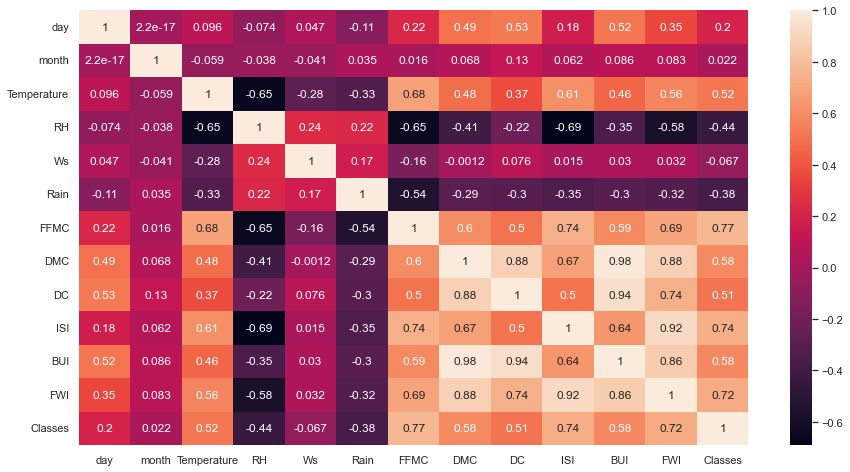

In [121]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True)

In [129]:
#since DMC,DC are higly correlated with BUI , droping the columns DMC and DC
df.drop(['DMC','DC'],axis=1,inplace=True)

In [131]:
#since FWI and ISI  are highly correlated ,dropping the column ISI
df.drop('ISI',axis=1,inplace=True)

In [233]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,BUI,FWI,Classes
0,1,6,29.0,57.0,18.0,0.0,65.7,3.4,0.5,0
1,2,6,29.0,61.0,13.0,1.3,64.4,3.9,0.4,0
2,3,6,26.0,82.0,22.0,13.1,47.1,2.7,0.1,0
3,4,6,25.0,89.0,13.0,2.5,28.6,1.7,0.0,0
4,5,6,27.0,77.0,16.0,0.0,64.8,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...
241,26,9,30.0,65.0,14.0,0.0,85.4,16.9,6.5,1
242,27,9,28.0,87.0,15.0,4.4,41.1,6.2,0.0,0
243,28,9,27.0,87.0,29.0,0.5,45.9,3.4,0.2,0
244,29,9,24.0,54.0,18.0,0.1,79.7,5.1,0.7,0


In [133]:
df.shape

(244, 10)

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

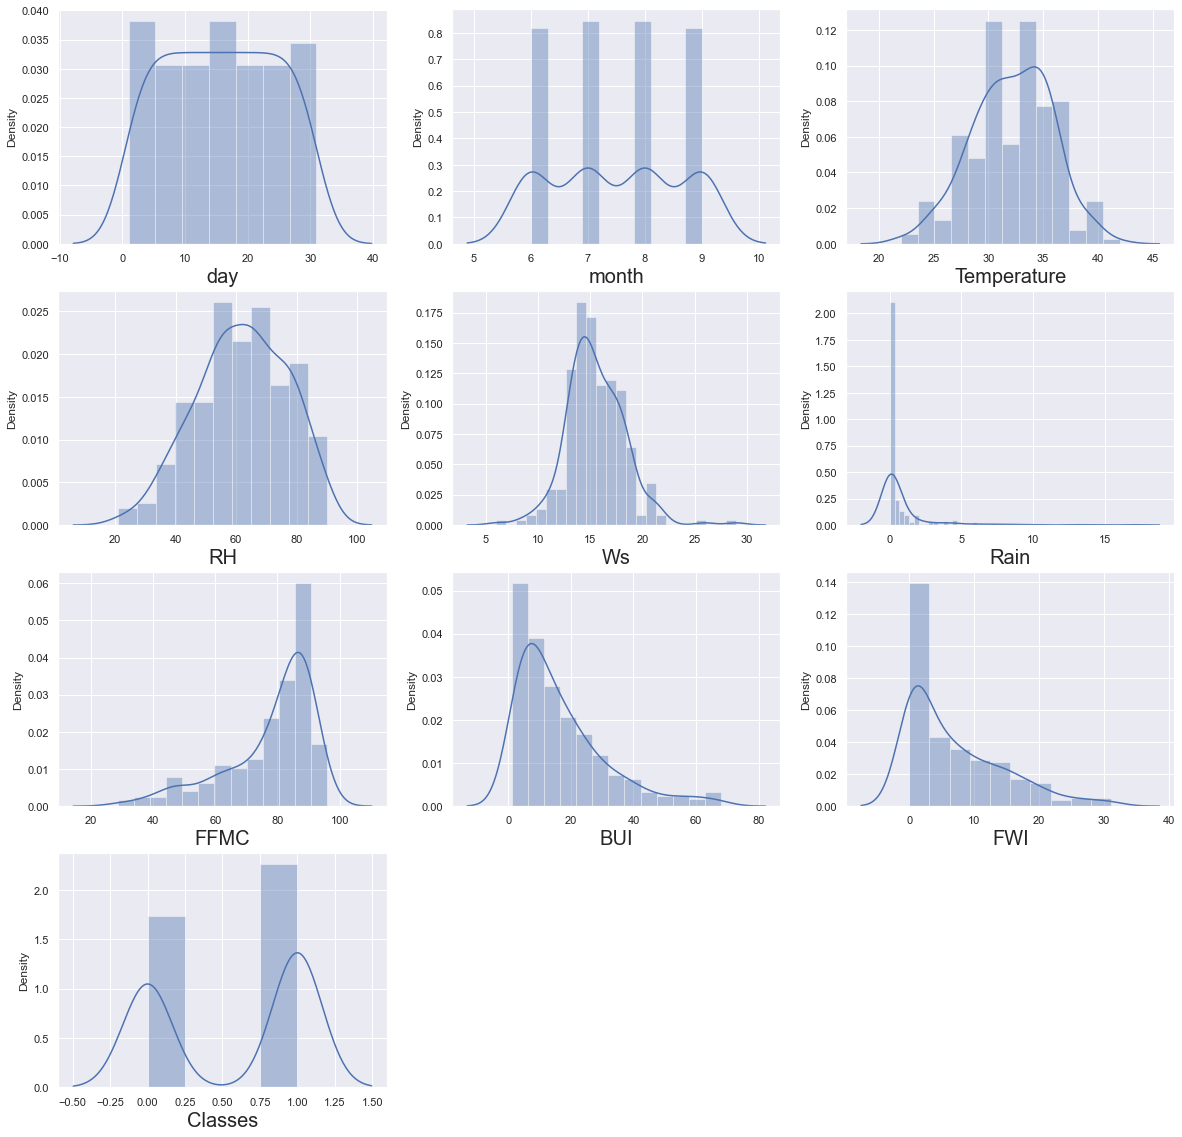

In [134]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=10 :     # as there are 10 columns in the df
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Govardhan\

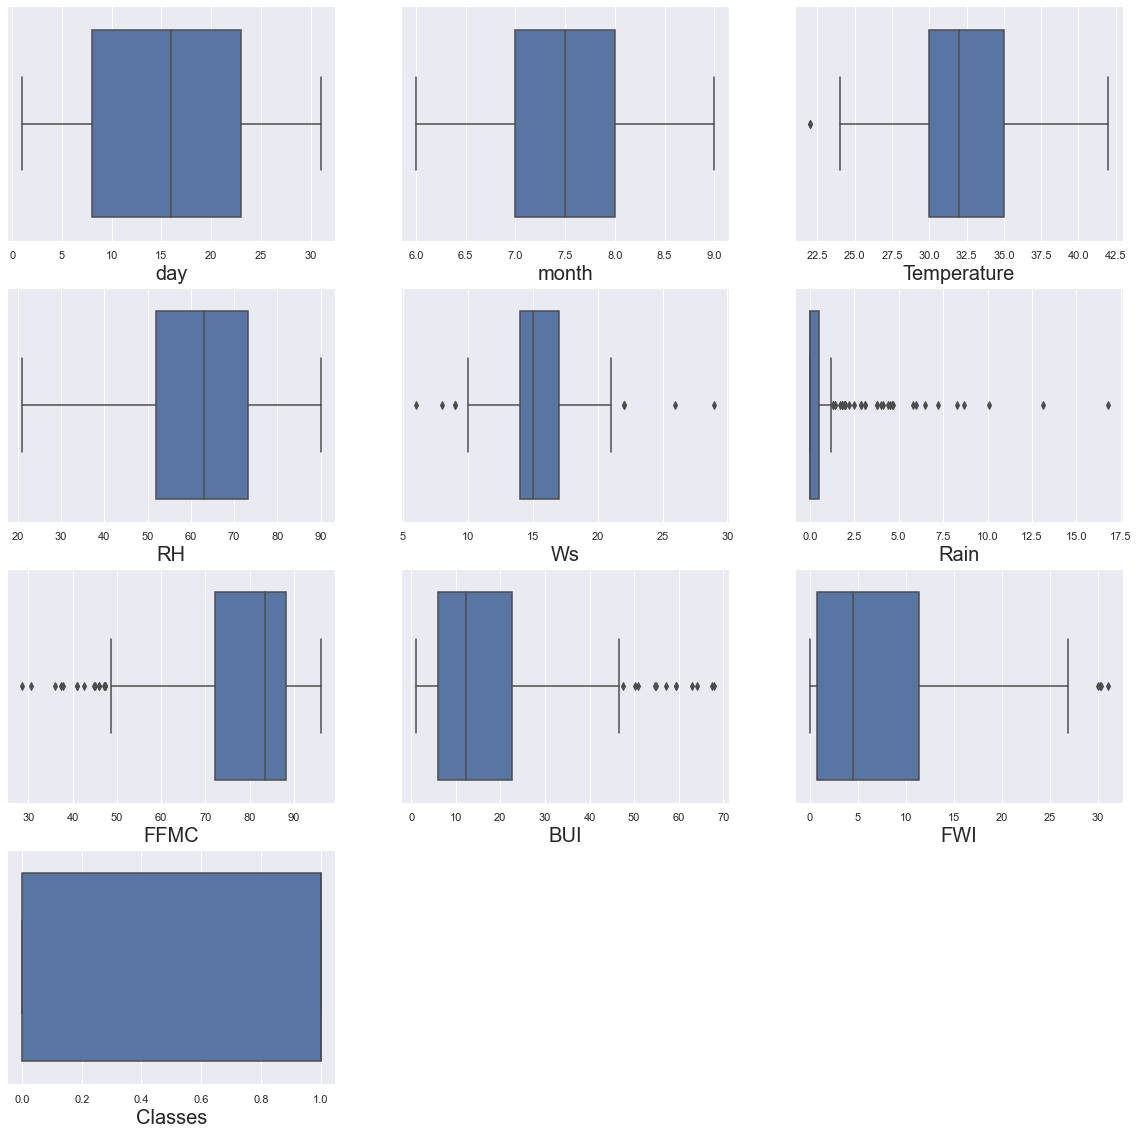

In [135]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=13 :     # as there are 13 columns in the df
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [141]:
#Finding whether the data is balanced or imbalanced
count_classes = pd.value_counts(df['Classes'], sort = True)

<AxesSubplot:>

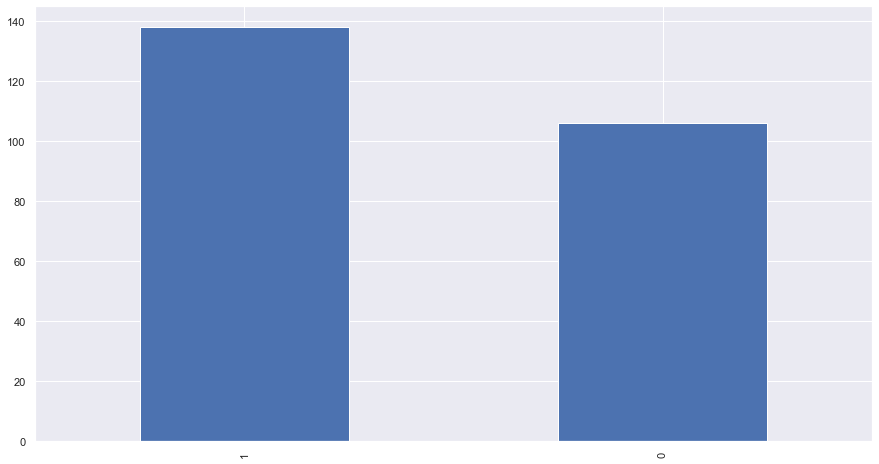

In [142]:
count_classes.plot(kind = 'bar')

In [143]:
#Since we mapped th fire with 1 and not fire with 0
fire=df[df['Classes']==1]
not_fire=df[df['Classes']==0]

In [144]:
fire.shape

(138, 10)

In [145]:
not_fire.shape

(106, 10)

### Analysis and Logistic regression on imbalanced dataset
1. calculating :
    1. Accuracy
    2. precision
    3. Recall
    4. F-Score

In [165]:
#Filtering the dependent and independent features
columns=[c for c in df.columns if c not in ['Classes']]
target='Classes'
x=df[columns]
y=df[target]

In [166]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [167]:
x_scaled=scaler.fit_transform(x)

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
mulcol = pd.DataFrame()
mulcol["multicolinearity"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
mulcol["independent_features"] = x.columns

In [169]:
mulcol

,multicolinearity,independent_features
0,1.459174,day
1,1.045123,month
2,2.398338,Temperature
3,2.626271,RH
4,1.228842,Ws
5,1.514844,Rain
6,3.429493,FFMC
7,5.519715,BUI
8,6.343406,FWI


### We can proceed the with the data now which has very less colinearity

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [179]:
x_train.shape

(183, 9)

In [180]:
x_test.shape

(61, 9)

In [182]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [183]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [184]:
pred1=logistic.predict(x_test)

In [188]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,pred1)

In [189]:
accuracy

0.9672131147540983

In [190]:
conf_mat=confusion_matrix(y_test,pred1)

In [191]:
TP=conf_mat[0][0]
FP=conf_mat[0][1]
FN=conf_mat[1][0]
TN=conf_mat[1][1]

In [195]:
#Accuracy
acc=(TP+TN)/(TP+TN+FP+FN)
print('ACCURACY = ',acc)
precision = TP/(TP+FP)
print("PRECISSON = ",precision)
recall = TP/(TP+FN)
print("RECALL = ",recall)
F1_SCORE=2*(precision*recall)/(precision+recall)
print("F1 SCORE = ",F1_SCORE)

ACCURACY =  0.9672131147540983
PRECISSON =  1.0
RECALL =  0.9230769230769231
F1 SCORE =  0.9600000000000001


### Analysis and Logistic regression on balanced dataset
1. calculating :
    1. Accuracy
    2. precision
    3. Recall
    4. F-Score

#### Hnadling imbalnced dataset using oversampling

In [209]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
x_res,y_res=smk.fit_resample(x,y)

<AxesSubplot:>

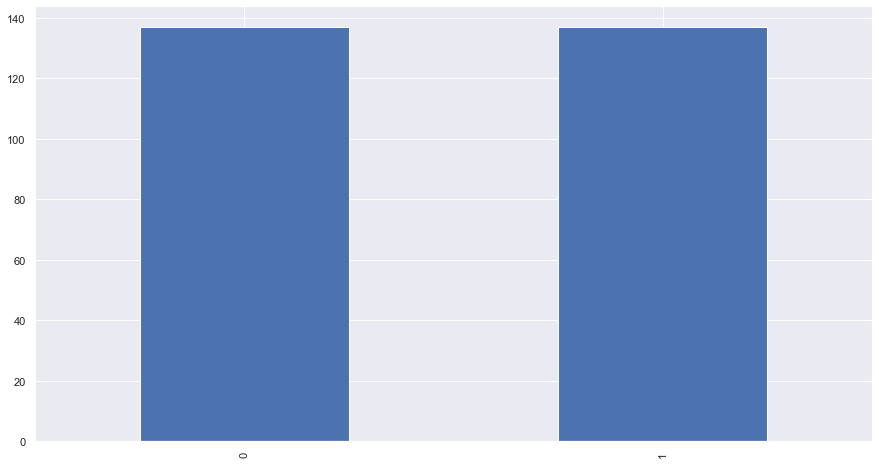

In [210]:
count_classes = pd.value_counts(y_res, sort = True)
count_classes.plot(kind='bar')

In [211]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 138, 0: 106})
Resampled dataset shape Counter({0: 137, 1: 137})


In [217]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [218]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [219]:
pred2=logistic.predict(x_test)

In [220]:
accuracy=accuracy_score(y_test,pred2)

In [221]:
accuracy

0.9565217391304348

In [223]:
conf_mat=confusion_matrix(y_test,pred2)
TP=conf_mat[0][0]
FP=conf_mat[0][1]
FN=conf_mat[1][0]
TN=conf_mat[1][1]
#Accuracy
acc=(TP+TN)/(TP+TN+FP+FN)
print('ACCURACY = ',acc)
precision = TP/(TP+FP)
print("PRECISSON = ",precision)
recall = TP/(TP+FN)
print("RECALL = ",recall)
F1_SCORE=2*(precision*recall)/(precision+recall)
print("F1 SCORE = ",F1_SCORE)

ACCURACY =  0.9565217391304348
PRECISSON =  1.0
RECALL =  0.9210526315789473
F1 SCORE =  0.958904109589041


## Observations
#### 1. model performance on imbalanced data
1. ACCURACY =  0.9672131147540983
2. PRECISSON =  1.0
3. RECALL =  0.9230769230769231
4. F1 SCORE =  0.9600000000000001

#### 2. model performance on balanced data
1. ACCURACY =  0.9565217391304348
2. PRECISSON =  1.0
3. RECALL =  0.9210526315789473
4. F1 SCORE =  0.958904109589041

